In [3]:
# from transformers import LlamaForCausalLM, LlamaTokenizer

In [4]:
# tokenizer = LlamaTokenizer.from_pretrained('models/Llama-2-7b-chat-hf/')
# model = LlamaForCausalLM.from_pretrained('models/Llama-2-7b-chat-hf/')

In [5]:
!pip install tiktoken

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


In [6]:
import tiktoken

In [7]:

encoding = tiktoken.encoding_for_model("gpt2")
encoding.encode("tiktoken is great!")
# [83, 1134, 30001, 318, 1049, 0]
num_tokens = len(encoding.encode("tiktoken is great!"))
print(num_tokens)

6


In [8]:
import glob

In [9]:
import json

In [10]:
import pandas as pd  

In [11]:
files = glob.glob("/workspace/local_data/curator/*.jsonl")

In [12]:
subset = files[:4]
#subset = files

In [13]:
len(files)

38436

In [14]:
total = 0
data = []
k = 0
for file in subset:
    k += 1
    lines = pd.read_json(path_or_buf=file, lines=True)
    for content in lines.text:
        num = len(encoding.encode(content))
        total += num
    data.append([k, total])
    print([k, total])
print(total)

[1, 70354]
[2, 71766]
[3, 72592]
[4, 89555]
89555


In [15]:
categories = ['raw', 'curator']

In [17]:
counts = []
data = {}
for cat in categories:
    k = 0
    data[cat] = []
    print(cat)
    files = glob.glob(f"/workspace/local_data/{cat}/*.jsonl")
    subset = files[:]
    total = 0
    for file in subset:
        k += 1
        lines = pd.read_json(path_or_buf=file, lines=True)
        for content in lines.text:
            num = len(encoding.encode(content))
            total += num
        data[cat].append([k, total])
    counts.append(total)
    print(total)
    

raw


682254403
curator
566607633


In [18]:
(counts[0] - counts[-1])/counts[-1]*100

20.41037982275117

In [ ]:
8 GPUS 700 wats
700*8
194 hours
160 hours
34 hours diff

In [53]:
34*8*.700*np.array([200, 900, 1100, 50, 10, 18])*1e-3

array([ 38.08  , 171.36  , 209.44  ,   9.52  ,   1.904 ,   3.4272])

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
print(len(data['raw']) - len(data['curator'])/len(data['raw'])*100)

39118.99148328531


In [34]:
len(data['raw']) - len(data['curator']), len(data['raw'])

(781, 39217)

In [35]:
781/39217

0.01991483285309942

In [45]:
result

array({'raw': [[1, 74001], [2, 77747], [3, 80038], [4, 99389], [5, 105470], [6, 106471], [7, 151074], [8, 172438], [9, 181814], [10, 185804], [11, 197412], [12, 232060], [13, 249832], [14, 270329], [15, 326032], [16, 384670], [17, 406594], [18, 433885], [19, 458871], [20, 460450], [21, 462460], [22, 468636], [23, 479141], [24, 486740], [25, 491555], [26, 507587], [27, 508615], [28, 517778], [29, 577982], [30, 601587], [31, 607895], [32, 648908], [33, 764394], [34, 775241], [35, 785533], [36, 790113], [37, 794180], [38, 818647], [39, 845923], [40, 865885], [41, 986788], [42, 1001428], [43, 1003271], [44, 1023089], [45, 1049035], [46, 1062795], [47, 1096416], [48, 1099231], [49, 1099918], [50, 1106200], [51, 1110045], [52, 1151782], [53, 1161163], [54, 1181967], [55, 1211079], [56, 1227638], [57, 1258498], [58, 1269519], [59, 1274300], [60, 1294613], [61, 1328789], [62, 1385525], [63, 1393978], [64, 1433681], [65, 1439353], [66, 1457722], [67, 1472668], [68, 1500598], [69, 1519124], [70,

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

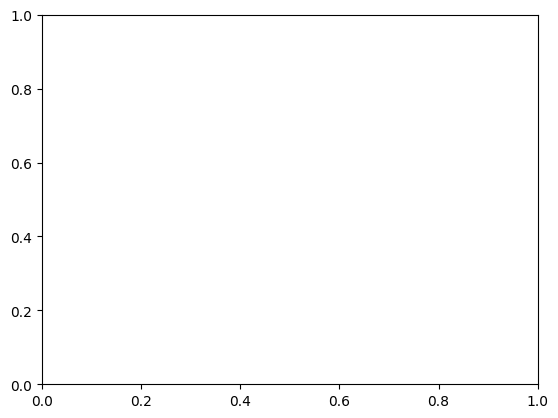

In [56]:
result = []
tokens_data = np.array(data.copy())

fig, ax1 = plt.subplots(1, 1, sharex=True)

ax1.plot(np.array(tokens_data['raw'])[:, 0], np.array(tokens_data['raw'])[:, 1], label = 'raw')
ax1.plot(result[:,0], result[:,2], label = 'curator')

ax1.set_ylabel('# of tokens')
ax1.set_xlabel('# of files')
ax1.legend()

fig.tight_layout()
plt.savefig('fig_tokens.png')

In [69]:
data

array({'raw': [[1, 74001], [2, 77747], [3, 80038], [4, 99389], [5, 105470], [6, 106471], [7, 151074], [8, 172438], [9, 181814], [10, 185804], [11, 197412], [12, 232060], [13, 249832], [14, 270329], [15, 326032], [16, 384670], [17, 406594], [18, 433885], [19, 458871], [20, 460450], [21, 462460], [22, 468636], [23, 479141], [24, 486740], [25, 491555], [26, 507587], [27, 508615], [28, 517778], [29, 577982], [30, 601587], [31, 607895], [32, 648908], [33, 764394], [34, 775241], [35, 785533], [36, 790113], [37, 794180], [38, 818647], [39, 845923], [40, 865885], [41, 986788], [42, 1001428], [43, 1003271], [44, 1023089], [45, 1049035], [46, 1062795], [47, 1096416], [48, 1099231], [49, 1099918], [50, 1106200], [51, 1110045], [52, 1151782], [53, 1161163], [54, 1181967], [55, 1211079], [56, 1227638], [57, 1258498], [58, 1269519], [59, 1274300], [60, 1294613], [61, 1328789], [62, 1385525], [63, 1393978], [64, 1433681], [65, 1439353], [66, 1457722], [67, 1472668], [68, 1500598], [69, 1519124], [70,

In [62]:
result = []
tokens_data = dict()
data = dict(data)
for i in range(len(tokens_data['curator'])):
    # Append a new list that contains the first item from the 'raw' list and the second item from the 'curator' list
    loss = 0 #100*(tokens_data['raw'][i][1] - tokens_data['curator'][i][1]) / tokens_data['raw'][i][1]
    result.append([tokens_data['raw'][i][0], tokens_data['raw'][i][1], tokens_data['curator'][i][1], loss])

result = np.array(result)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)


ax1.plot(result[:,0], result[:,1], label = 'raw')
ax1.plot(result[:,0], result[:,2], label = 'curator')
ax2.plot(result[:,0], result[:,3])

ax1.set_ylabel('# of tokens')
ax2.set_ylabel('loss %')
ax2.set_xlabel('# of files')
ax1.legend()

fig.tight_layout()
plt.savefig('fig_tokens.png')

TypeError: iteration over a 0-d array

In [41]:
ax

<Axes: >